In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd

In [3]:
#2차원 으로 정의
x = np.array([[0,0], [0,1], [1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [203]:
#단일 선형 신경망
model = Sequential() 
model.add(Dense(1,input_dim=2)) #1번째 층
model.add(Activation('sigmoid'))
model.summary()


#Dense 1에서 파라미터 값은 3 , 구해야할 값들은 3개이다 , w1 , w2 , b
#입력데이터가 몇개인지 모르기 때문에 출력이 None으로 나옴
#학습한 파라미터는 3개 , 학습되지 않은 파라미터는 0개

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [277]:
model = Sequential() 
model.add(Dense(10,input_dim=2)) #1번째 히든층 , (노드수 * input) + bias(node) 수
model.add(Activation('sigmoid'))

model.add(Dense(10)) #출력 층 
model.add(Activation('sigmoid'))

model.add(Dense(10)) #출력 층 
model.add(Activation('sigmoid'))

model.add(Dense(1)) #출력 층 
model.add(Activation('sigmoid'))


model.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_33 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_34 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_35 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)               

In [278]:
# 컴파일
# 어떤 최적화 방법을 사용하고 어떻게 검증(cost)을 할지, 정하는 부분
# loss = 손실 함수 , optimizer = 최적화 방법
# adam 이 웬만하면 쓰는게 좋다
model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [279]:
# 학습
# batch_size - 한번에 학습할 양, 경사하강법 의 크기?, 데이터가 4개밖에 없으므로 4까지 지정가능
# 배치사이즈는 
# epochs - 반복적으로 학습할 수
model.fit(x,y, batch_size=4, epochs=5000, verbose=0)
print(model.predict(x))

[[4.258665e-04]
 [9.995012e-01]
 [9.995969e-01]
 [5.775776e-04]]


In [274]:
p = model.predict(x)
print( (p > 0.5)*1 )

[[0]
 [1]
 [1]
 [0]]


(10000, 2)
<class 'numpy.ndarray'>
(10000, 1)


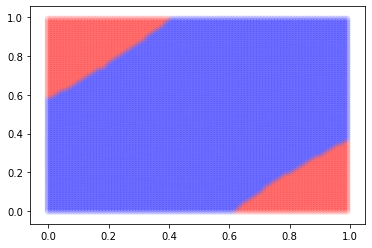

In [309]:
xx, yy = np.mgrid[0:1:0.01, 0:1:0.01] #mesh grid , 엄청많은 점을 찍어준다
grid = np.c_[xx.flatten(), yy.flatten()] # flatten() , 2차원을 1차원으로 변경해주는 함수
print(grid.shape)
h = model.predict_proba(grid) # 확률 값을 표시

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.1)  
plt.savefig('xor.png')

In [286]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
print(xx)
print()
print(yy)

grid = np.c_[xx.flatten(), yy.flatten()] # flatten() , 2차원을 1차원으로 변경해주는 함수
print(grid.shape)
print(grid)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.04 0.04 0.04 ... 0.04 0.04 0.04]
 ...
 [0.94 0.94 0.94 ... 0.94 0.94 0.94]
 [0.96 0.96 0.96 ... 0.96 0.96 0.96]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]]

[[0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 ...
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]]
(2500, 2)
[[0.   0.  ]
 [0.   0.02]
 [0.   0.04]
 ...
 [0.98 0.94]
 [0.98 0.96]
 [0.98 0.98]]
